# Real Estate Valuation Data Set
This research aimed at predicting housing prices within New Taipei City, Taiwan.

Data downloaded from: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
(https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Section Order
* Exploratory Data Analysis (Data understanding)
* Normalization (Data preparation)
* Train-Test Split (Validation)
* Linear Regression (Algorithm)
* R2 (Evaluation)


## Exploratory Data Analysis EDA (Data understanding)

In [289]:
from time import time
import math
import joblib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Display more data on linear regression
from statsmodels import regression
import statsmodels.api as sm
from sklearn import preprocessing # For normalization

# import models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier

# import tools to validate and split data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# import package to avoid updated warnings from sklearn
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# ignore Convergence Warning from Sklearn
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

#housing = pd.read_excel(r"C:\Users\ASUS\Predicting House Pricing\Real_estate_data.xlsx")
housing = pd.read_excel( 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")
# '%20' for the ' ' character

housing # 414 rows * 8 columns

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [290]:
housing.corr() # Not exactly unreadable but it makes no sense trying to figure this out by yourself

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

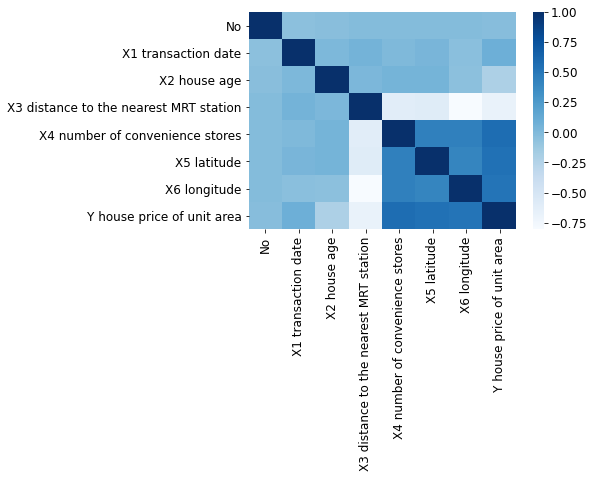

In [291]:
sns.heatmap(housing.corr(), cmap="Blues") # About as pretty as useless.

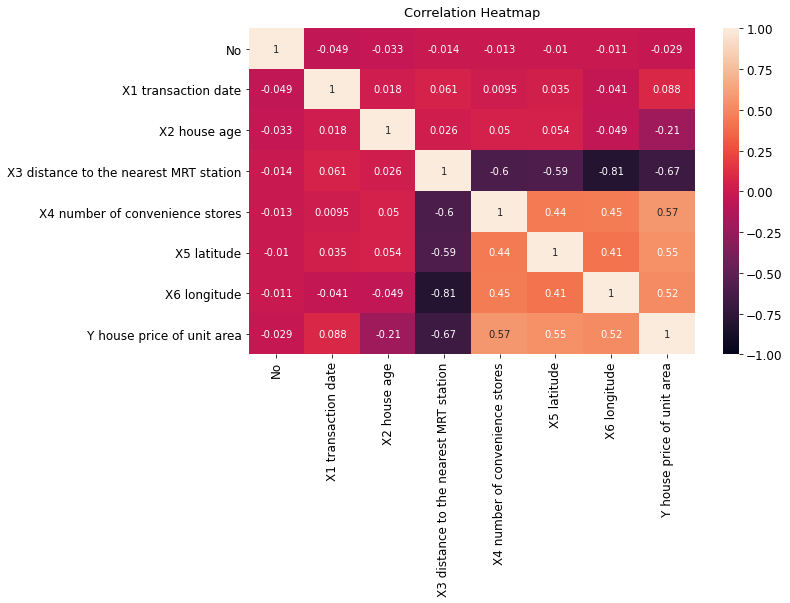

In [292]:
# Increase the size of the heatmap.
plt.figure(figsize=(10, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the 
# correlation values on the heatmap.
heatmap = sns.heatmap(housing.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12);

# It's pretty now, thanks to Szabo Bibor 
# medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

As you can see in the row of "Y house price of unite area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)", the stronger the relation, the higher or lower the value, regarding to other variables (such as X3, X4).

## Selecting target variable

In [293]:
flag = False
label = input('Choose a column you want to predict: ') #Y house price of unit area
while label not in housing.columns: 
    label = input("Unexpected result! Please try again or check your spelling: ")
    flag = True
    
if flag == True: print('\nSuccessful! You have selected \"%s".' %label)

move = housing[label]

housing.drop(labels=label, axis=1, inplace=True)
housing.insert(len(housing.columns), label, move)
housing

Choose a column you want to predict: Y house price of unit area


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [294]:
housing.corr().sort_values(by=label, ascending=False) # sort by ascending order of the chosen label

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613


In [295]:
# Display only the label variable column
housing.corr()[[label]].sort_values(by=label, ascending=False)

,Y house price of unit area
Y house price of unit area,1.000000
X4 number of convenience stores,0.571005
X5 latitude,0.546307
X6 longitude,0.523287
X1 transaction date,0.087529
No,-0.028587
X2 house age,-0.210567
X3 distance to the nearest MRT station,-0.673613


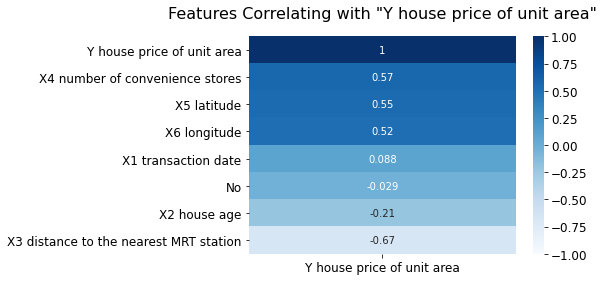

In [296]:
# Often, we want to display the correlation between every independent variable and our target variable
# In this case, the column "Y house price of unit area" (stored in label) is the predicted variable that we want to display
#plt.figure(figsize=(3, 5))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

heatmap = sns.heatmap(
    housing.corr()[[label]].sort_values(by=label, ascending=False), vmin=-1, vmax=1, annot=True, cmap="Blues") #, cmap="Blues"
# seaborn color maps => seaborn.pydata.org/tutorial/color_palettes.html
heatmap.set_title('Features Correlating with \"%s\"' %label, fontdict={'fontsize':16}, pad=18);

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [297]:
# Summary statistics
housing.describe()
# The count shows how many values are avaiable. As you can see, there is no missing data in this set (all equals to 414).

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [298]:
# Access the count row to automatically check missing values
data = housing.describe()

if max(data.loc['count']) == min(data.loc['count']): print("There are no missing values!")
else: print("There are %d values missing!" %(max(data.loc['count']) - min(data.loc['count']))) 
# For more analysis, read medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd\

#print("The first element is %d" %data.loc['count'][0])
data.loc['count']

There are no missing values!


No                                        414.0
X1 transaction date                       414.0
X2 house age                              414.0
X3 distance to the nearest MRT station    414.0
X4 number of convenience stores           414.0
X5 latitude                               414.0
X6 longitude                              414.0
Y house price of unit area                414.0
Name: count, dtype: float64

In [299]:
housing.info() # Just print info, cannot access info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [300]:
# Getting an idea of the patterns of the data
#sns.pairplot(housing)
# No need to run it

## Data preparation
<b>Feature Selection</b>: select the related features and remove the irrelevant ones
* <b>Reduce features</b> having high correlations with each other
* Use decision tree to determine <b>which features are more important</b> (higher levels)

<b>Feature Engineering</b>: set up your data for better model performance
* <b>Standardization</b>: transform the data to have a mean of 0 and a standard deviation of 1
* <b>Normalization</b>: rescale the data to values between 0 and 1 (min-max scaling)
* <b>One Hot Encoding</b>: turn categorical data into number columns

## Normalization

In [301]:
housing.iloc[:,len(housing.columns)-1:] # choose from [before :] to [after :], the first : is for rows, second for columns

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [302]:
# Do not need to normalize out output/target variable because normalization is applied to train faster and easier
features = preprocessing.normalize(housing.iloc[:,:len(housing.columns)-1])
features = pd.DataFrame(features)

# Add headers to the normalized dataset
features.columns = housing.iloc[:,:len(housing.columns)-1].columns
# Add the y_labels dataset, you could skip this and do it later (after feature engineering)
labels = housing[label]

features

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.000495,0.997085,0.015851,0.042044,0.004953,0.012375,0.060204
1,0.000980,0.986713,0.009559,0.150290,0.004412,0.012245,0.059578
2,0.001432,0.961474,0.006351,0.268344,0.002387,0.011931,0.058037
3,0.001910,0.961470,0.006351,0.268354,0.002388,0.011932,0.058039
4,0.002434,0.979888,0.002434,0.190137,0.002434,0.012160,0.059169
...,...,...,...,...,...,...,...
409,0.089686,0.440336,0.002997,0.892925,0.000000,0.005456,0.026578
410,0.199518,0.977041,0.002718,0.043912,0.004369,0.012124,0.059003
411,0.196602,0.960699,0.008971,0.186566,0.003340,0.011920,0.057997
412,0.200353,0.976539,0.003929,0.050845,0.002426,0.012112,0.058961


In [303]:
# Feature selecting out transaction date and No since we are not taking time into account

features = features.iloc[:,2:len(features.columns)]
# Side note: it is also common to use logarithm instead of normalization when dealing with money values
features

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.015851,0.042044,0.004953,0.012375,0.060204
1,0.009559,0.150290,0.004412,0.012245,0.059578
2,0.006351,0.268344,0.002387,0.011931,0.058037
3,0.006351,0.268354,0.002388,0.011932,0.058039
4,0.002434,0.190137,0.002434,0.012160,0.059169
...,...,...,...,...,...
409,0.002997,0.892925,0.000000,0.005456,0.026578
410,0.002718,0.043912,0.004369,0.012124,0.059003
411,0.008971,0.186566,0.003340,0.011920,0.057997
412,0.003929,0.050845,0.002426,0.012112,0.058961


At the end, we have the features and the labels. Therefore, we are ready to train the linear models!

## Slipt data into train and test sets

In [304]:
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42) #split randomly
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [305]:
print(len(labels), len(y_train), len(y_val), len(y_test), '\n') # Check the length of each set

print('Training set: {:.0%}'.format(len(y_train) / len(labels))) # n is the desired number of decimal places.
print('Validation set: {:.0%}'.format(len(y_val) / len(labels)))
print('Test set: {:.0%}'.format(len(y_test) / len(labels)))

414 248 83 83 

Training set: 60%
Validation set: 20%
Test set: 20%


<b>Output the training, validation and test sets as csv files</b>

In [306]:
X_train.to_csv(r"C:\Users\ASUS\Predicting House Pricing\train_features.csv", index=False)
X_val.to_csv(r"C:\Users\ASUS\Predicting House Pricing\validation_features.csv", index=False)
X_test.to_csv(r"C:\Users\ASUS\Predicting House Pricing\test_features.csv", index=False)

y_train.to_csv(r"C:\Users\ASUS\Predicting House Pricing\train_labels.csv", index=False) 
y_val.to_csv(r"C:\Users\ASUS\Predicting House Pricing\validation_labels.csv", index=False)
y_test.to_csv(r"C:\Users\ASUS\Predicting House Pricing\test_labels.csv", index=False)

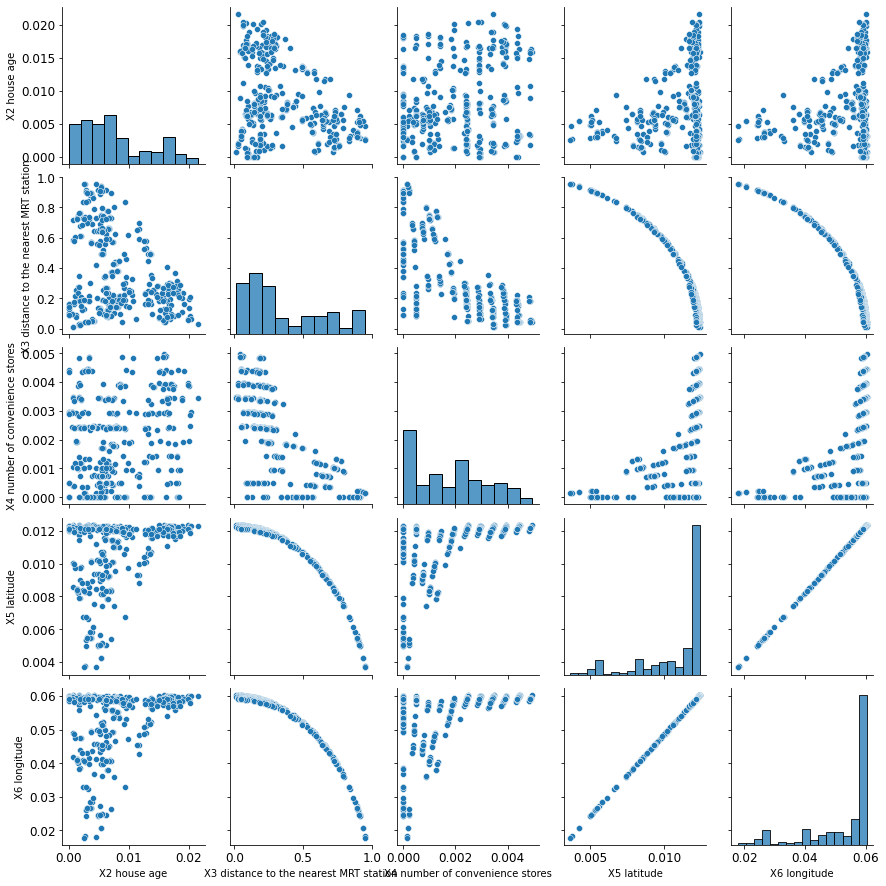

In [307]:
#correlation plot for normalized data:
sns.pairplot(features)

## Training

In [308]:
#Trains the linear regression algorithm on the training dataset
model = LinearRegression().fit(X_train, y_train)

In [309]:
#Intercept value
model.intercept_

70.09546800825086

In [310]:
#Coefficent values
coeff_df = pd.DataFrame(model.coef_.T, X_train.columns, columns=['Coefficients'])
coeff_df

,Coefficients
X2 house age,-546.966473
X3 distance to the nearest MRT station,-43.997333
X4 number of convenience stores,733.984571
X5 latitude,750750.147587
X6 longitude,-154506.760436


In [311]:
def linreg(X,Y):
 # Running the linear regression
 X = sm.add_constant(X)
 model = regression.linear_model.OLS(Y, X).fit()
 return model.summary()

linreg(X_train.values, y_train.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     90.20
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           2.77e-53
Time:                        11:55:41   Log-Likelihood:                -882.74
No. Observations:                 248   AIC:                             1777.
Df Residuals:                     242   BIC:                             1799.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0955     11.014      6.364      0.000      48.400      91.791
x1          -546.9665    106.796     -5.122      0.000    -757.334    -336.599
x2           -43.9973      6.854     -6.419      0.000     -57.498     -30.496
x3           733.9846    548.416      1.338      0.182    -346.293    1814.262
x4          7.508e+05   1.29e+05      5.837      0.000    4.97e+05       1e+06
x5         -1.545e+05   2.64e+04     -5.842      0.000   -2.07e+05   -1.02e+05
==============================================================================
Omnibus:                      192.762   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3827.879
Skew:                           2.844   Prob(JB):                         0.00
Kurtosis:                      21.387   Cond. No.                     2.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- std err (distance from the correct values to the predicted ones): the smaller, the better 
- P>|t|: Should be smaller than 0.05
- According to the pairplot graphs above, you could see X3 has a high P>|t| because it's not a linear variable. Therefore, the Linear Regression cannot fit it into our line using the least square method.

In [312]:
# Make predictions of train and test set
y_train_predict = model.predict(X_train)
y_val_predict = model.predict(X_val)

In [313]:
#Examining actual values against the predictions of test set
compare = pd.DataFrame(y_val.copy())
compare['y_val_predict'] = y_val_predict
compare.head(10)

,Y house price of unit area,y_val_predict
9,22.1,26.752517
152,28.9,23.749961
364,33.1,39.099686
60,21.3,26.098775
271,26.5,42.574195
284,34.4,43.482979
239,29.7,31.205484
177,42.0,46.927299
66,50.7,50.098012
352,25.7,22.714732


<b>Coefficient of determination (R^2)</b> is the percentage of how many items lay on the fitted line:
* <u>Higher</u> R2 indicates <u>better</u> fit of the model
* 1: every point fits in the line
* 0: no point fits in the line

You cannot judge whether one R2 is good or not until you make comparisons with other state-of-the-art methods.

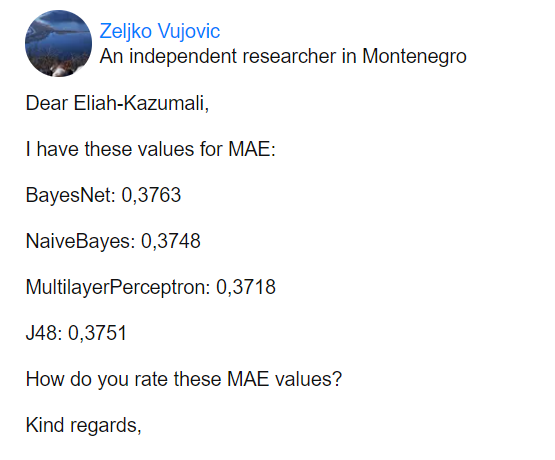

In [314]:
#checking accuracy using r2:
from sklearn.metrics import r2_score
#Training r2Coefficient of determination (R^2) is the percentage of 
train_r2_score = r2_score(y_train, y_train_predict)
print('Training coefficient of determination:', train_r2_score)

Training coefficient of determination: 0.6508016409069152


In [315]:
#Test r2
y_test_predict = model.predict(X_test)
test_r2_score = r2_score(y_test, y_test_predict)
print('Test coefficient of determination:', test_r2_score)

Test coefficient of determination: 0.6108494928036483


<b>Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)</b>
* Measure how far the predicted values deviate from the actual values
* <u>Lower</u> MAE, MSE and RMSE indicate <u>better</u> model performance (should be lower than 0.7)
* MSE and RMSE are sensitive to outliers

In [316]:
from sklearn import metrics
#Training set
print('Train Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_train, y_train_predict), 2))
print('Train Root Mean Squared Error (RMSE):', round(math.sqrt(metrics.mean_squared_error(y_train, y_train_predict)), 2))
#Test set
print('Test Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_test_predict), 2))
print('Test Root Mean Squared Error (RMSE):', round(math.sqrt(metrics.mean_squared_error(y_test, y_test_predict)), 2)) 

Train Mean Absolute Error (MAE): 5.41
Train Root Mean Squared Error (RMSE): 8.5
Test Mean Absolute Error (MAE): 5.18
Test Root Mean Squared Error (RMSE): 8.14
